# User engagment analysis the following are considered 


In [1]:
#import python library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go  
from IPython.display import Image
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler, normalize

In [ ]:
import os, sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from Data_exploration import *
from Display_data import *


In [16]:

df_tele=pd.read_csv(r"C:\Users\Genet Shanko\Desktop\Week_1_challange\Week1_challenge_data_source(CSV).csv",na_values=['numeric_only',None])
df_tele.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [17]:
# column names
df_tele.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [18]:
# number of data points
print(f" There are {df_tele.shape[0]} rows and {df_tele.shape[1]} columns")

 There are 150001 rows and 55 columns


In [20]:
# Group users
users_data = df_tele.groupby('MSISDN/Number')

In [21]:
# How long each session was
users_sessions= users_data['Dur. (ms)'].sum()
users_sessions

MSISDN/Number
3.360100e+10    116720.0
3.360100e+10    181230.0
3.360100e+10    134969.0
3.360101e+10     49878.0
3.360101e+10     37104.0
                  ...   
3.379000e+10      8810.0
3.379000e+10    140988.0
3.197021e+12    877385.0
3.370000e+14    253030.0
8.823971e+14    869844.0
Name: Dur. (ms), Length: 106856, dtype: float64

In [22]:
# Aggregation of Total values
df_tele["Total Uploads"]=df_tele["Google UL (Bytes)"]+df_tele["Email UL (Bytes)"]+df_tele["Social Media UL (Bytes)"]+df_tele["Youtube UL (Bytes)"]+df_tele["Netflix UL (Bytes)"]+df_tele["Gaming UL (Bytes)"]+df_tele["Other UL (Bytes)"]
df_tele["Total Downloads"]=df_tele["Google DL (Bytes)"]+df_tele["Email DL (Bytes)"]+df_tele["Social Media DL (Bytes)"]+df_tele["Youtube DL (Bytes)"]+df_tele["Netflix DL (Bytes)"]+df_tele["Gaming DL (Bytes)"]+df_tele["Other DL (Bytes)"]
df_tele['Total UL and DL']=df_tele['Total DL (Bytes)']+df_tele["Total UL (Bytes)"]

In [23]:
# Aggregation of Total Social Media data
df_tele["Youtube_Total_Data"]=df_tele["Youtube DL (Bytes)"]+df_tele["Youtube UL (Bytes)"]
df_tele["Google_Total_Data"]=df_tele["Google DL (Bytes)"]+df_tele["Google UL (Bytes)"]
df_tele["Email_Total_Data"]=df_tele["Email DL (Bytes)"]+df_tele["Email UL (Bytes)"]
df_tele["Social_Media_Total_Data"]=df_tele["Social Media DL (Bytes)"]+df_tele["Social Media UL (Bytes)"]
df_tele["Netflix_Total_Data"]=df_tele["Netflix DL (Bytes)"]+df_tele["Netflix UL (Bytes)"]
df_tele["Gaming_Total_Data"]=df_tele["Gaming DL (Bytes)"]+df_tele["Gaming UL (Bytes)"]
df_tele["Other_Total_Data"]=df_tele["Other DL (Bytes)"]+df_tele["Other UL (Bytes)"]

In [24]:
users = df_tele[['MSISDN/Number', 'Bearer Id', 'Dur. (ms).1', 'Total UL and DL']].copy().rename(columns={'Dur. (ms).1': 'time_duration'})
users

,MSISDN/Number,Bearer Id,time_duration,Total UL and DL
0,3.366496e+10,1.311448e+19,1.823653e+09,345629377.0
1,3.368185e+10,1.311448e+19,1.365104e+09,707185356.0
2,3.376063e+10,1.311448e+19,1.361763e+09,307690973.0
3,3.375034e+10,1.311448e+19,1.321510e+09,889352748.0
4,3.369980e+10,1.311448e+19,1.089009e+09,607681403.0
...,...,...,...,...
149996,3.365069e+10,7.277826e+18,8.123076e+07,631804110.0
149997,3.366345e+10,7.349883e+18,9.797070e+07,705783925.0
149998,3.362189e+10,1.311448e+19,9.824953e+07,627698629.0
149999,3.361962e+10,1.311448e+19,9.791063e+07,401522016.0


In [25]:
users = users.groupby('MSISDN/Number').agg({'Bearer Id': 'count', 'time_duration': 'sum', 'Total UL and DL': 'sum'})
users = users.rename(columns={'Bearer Id': 'sessions'})
users.head(10)

,sessions,time_duration,Total UL and DL
MSISDN/Number,,,
3.360100e+10,1,116720140.0,8.786906e+08
3.360100e+10,1,181230963.0,1.568596e+08
3.360100e+10,1,134969374.0,5.959665e+08
3.360101e+10,1,49878024.0,4.223207e+08
3.360101e+10,2,37104453.0,1.457411e+09
3.360101e+10,2,253983077.0,6.152172e+08
3.360101e+10,2,128360523.0,6.547231e+08
3.360101e+10,1,86399977.0,3.326604e+08
3.360101e+10,2,495702147.0,9.901322e+08


In [26]:
users.nlargest(10, 'time_duration')

,sessions,time_duration,Total UL and DL
MSISDN/Number,,,
3.362578e+10,17,1.855376e+10,8.499621e+09
3.361489e+10,17,9.966906e+09,8.846226e+09
3.376054e+10,15,9.279442e+09,8.514774e+09
3.362632e+10,18,8.791937e+09,7.971167e+09
3.366716e+10,13,8.744922e+09,5.618394e+09
3.366284e+10,9,6.614274e+09,4.000098e+09
3.366469e+10,9,6.288736e+09,5.682007e+09
3.360313e+10,12,6.287767e+09,4.976195e+09
3.366746e+10,6,5.649885e+09,2.600522e+09


In [40]:
import plotly.io as pio
from IPython.display import Image
def mult_hist(sr, rows, cols, title_text, subplot_titles, interactive=False):
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=subplot_titles)
    for i in range(rows):
        for j in range(cols):
            x = ["-> " + str(i) for i in sr[i+j].index]
            fig.add_trace(go.Bar(x=x, y=sr[i+j].values), row=i+1, col=j+1)
    fig.update_layout(showlegend=False, title_text=title_text)
    if(interactive):
        fig.show()
    else:
        return Image(pio.to_image(fig, format='png', width=1200))

In [44]:
sessions = users.nlargest(10, "sessions")['sessions']
duration = users.nlargest(10, "time_duration")['time_duration']
data_volume = users.nlargest(10, "Total UL and DL")['Total UL and DL']

#mult_hist([sessions, duration, data_volume], 1,3, "User metrix", ['sessions', 'time_duration','Total UL and DL'])

<AxesSubplot:>

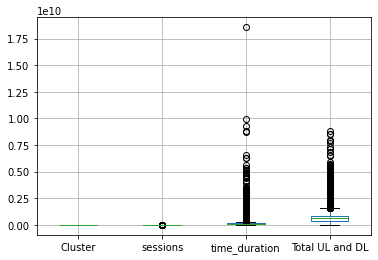

In [39]:
users.boxplot()

In [30]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(users)
pd.DataFrame(scaled_array).head(5)

,0,1,2
0,-0.481290,-0.158017,0.382297
1,-0.481290,0.188149,-1.087666
2,-0.481290,-0.060092,-0.193453
3,-0.481290,-0.516693,-0.547071
4,0.753493,-0.585236,1.560825


In [31]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

,0,1,2
0,-0.758374,-0.248989,0.602390
1,-0.399682,0.156246,-0.903240
2,-0.921689,-0.115078,-0.370469
3,-0.538807,-0.578440,-0.612449
4,0.411897,-0.319919,0.853225


In [32]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_normalized)
kmeans.labels_

array([0, 2, 2, ..., 1, 2, 1])

In [33]:
users.insert(0, 'Cluster', kmeans.labels_)
users.head(5)

,Cluster,sessions,time_duration,Total UL and DL
MSISDN/Number,,,,
3.360100e+10,0,1,116720140.0,8.786906e+08
3.360100e+10,2,1,181230963.0,1.568596e+08
3.360100e+10,2,1,134969374.0,5.959665e+08
3.360101e+10,2,1,49878024.0,4.223207e+08
3.360101e+10,1,2,37104453.0,1.457411e+09


In [34]:
users['Cluster'].value_counts()

2    47876
0    29698
1    29282
Name: Cluster, dtype: int64